<a href="https://colab.research.google.com/github/aguilarmadeira/Optimization/blob/main/SAExemploAula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melhor ponto: x = 1.6764, y = 2.5400, valor = 116.3986
Pior ponto aceito: x = 1.7743, y = 2.7641, valor = 118.5304
Pior ponto aceito: x = 1.7640, y = 2.8052, valor = 121.2857
Melhor ponto: x = 2.0185, y = 2.9132, valor = 109.0942
Pior ponto aceito: x = 2.0669, y = 2.9712, valor = 109.2403
Melhor ponto: x = 2.2163, y = 2.9506, valor = 97.0830
Melhor ponto: x = 2.2476, y = 2.8652, valor = 89.6286
Pior ponto aceito: x = 1.9923, y = 2.9306, valor = 112.0479
Pior ponto aceito: x = 1.9681, y = 3.0820, valor = 124.1697
Melhor ponto: x = 1.9727, y = 3.0633, valor = 122.4461
Pior ponto aceito: x = 2.1260, y = 3.2103, valor = 123.4097
Pior ponto aceito: x = 2.0912, y = 3.2259, valor = 127.3022
Pior ponto aceito: x = 1.9826, y = 3.2899, valor = 141.0200
Melhor ponto: x = 1.8777, y = 3.1479, valor = 135.7392
Melhor ponto: x = 1.8638, y = 3.1288, valor = 135.1826
Melhor ponto: x = 1.9087, y = 3.0296, valor = 124.5836
Melhor ponto: x = 1.8861, y = 2.8641, valor = 115.7742
Pior ponto aceito: x = 1.82

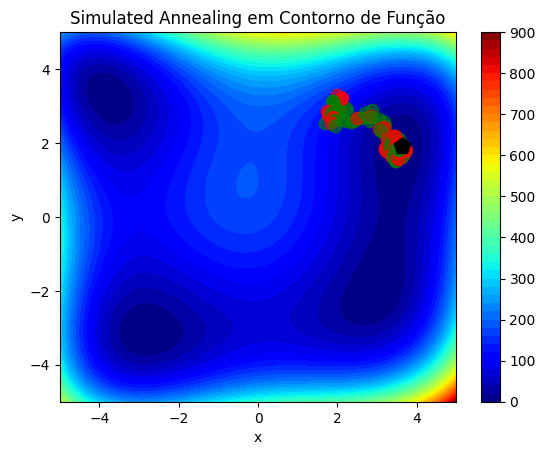

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Definir a função objetivo
def f(x, y):
    return (x**2 - y - 11)**2 + (y**2 + x - 7)**2

# Configuração inicial da figura
fig, ax = plt.subplots()
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
cp = ax.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar(cp)
plt.title('Simulated Annealing em Contorno de Função')
plt.xlabel('x')
plt.ylabel('y')

# Dados iniciais
np.random.seed(0)  # Permite a repetição dos resultados entre testes
x0 = np.array([1.5, 2.5])  # Ponto inicial
T = 30.0  # Temperatura inicial
Ts = 1e-1  # Temperatura mínima
alpha = 0.90  # Fator de redução da temperatura
nn = 3  # Número de vezes que calculamos pontos a uma determinada temperatura

# Visualização do ponto inicial
scatter = ax.scatter([], [], color='k', s=100)

x_atual = x0
f_atual = f(x_atual[0], x_atual[1])
cont_nn = 0

# Configuração do escritor de vídeo
metadata = dict(title='Simulated Annealing', artist='Matplotlib', comment='Simulated Annealing in Python')
writer = FFMpegWriter(fps=5, metadata=metadata)

# Criar um vídeo
with writer.saving(fig, "simulated_annealing.mp4", 100):
    # Algoritmo de Simulated Annealing
    while T > Ts:
        # Geração de novo ponto perturbado (dependente da temperatura)
        x_new = x_atual + np.random.randn(2) / 10

        # Avaliação do novo ponto
        f_new = f(x_new[0], x_new[1])
        delta = f_new - f_atual

        if delta <= 0:
            # Aceita o novo ponto (melhora)
            x_atual = x_new
            f_atual = f_new
            cont_nn += 1

            # Exibir no ecrã os dados do melhor ponto
            print(f'Melhor ponto: x = {x_atual[0]:.4f}, y = {x_atual[1]:.4f}, valor = {f_atual:.4f}')

            # Visualização do melhor ponto
            ax.scatter(x_atual[0], x_atual[1], color='g', s=80, label='Melhor ponto', alpha=0.6)
        else:
            # Aceita com probabilidade p
            p = np.exp(-delta / T)
            if np.random.rand() <= p:
                x_atual = x_new
                f_atual = f_new
                cont_nn += 1

                # Exibir no ecrã os dados do pior ponto aceito
                print(f'Pior ponto aceito: x = {x_atual[0]:.4f}, y = {x_atual[1]:.4f}, valor = {f_atual:.4f}')

                # Visualização do pior ponto aceito
                ax.scatter(x_atual[0], x_atual[1], color='r', s=80, label='Pior ponto aceito', alpha=0.6)

        # Reduzir a temperatura se necessário
        if cont_nn >= nn:
            T *= alpha
            cont_nn = 0

        # Capturar o frame para o vídeo
        writer.grab_frame()

    # Escrita final de dados no ecrã
    print(f'Ótimo encontrado: x = {x_atual[0]:.4f}, y = {x_atual[1]:.4f}, valor = {f_atual:.4f}')

    # Visualização do ponto final
    ax.scatter(x_atual[0], x_atual[1], color='k', s=150, marker='p', label='Ótimo encontrado')

# Mostrar o gráfico final
plt.show()
